**Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import tensorflow as tf
from tensorflow import keras
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.manifold import TSNE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc
%matplotlib inline

**Loading DataSet**

In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [3]:
df_train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df_test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df_train.shape

(42000, 785)

In [6]:
df_test.shape

(28000, 784)

**Exploratory Data Analysis**

In [7]:
df_train.isnull().any().describe()

count       785
unique        1
top       False
freq        785
dtype: object

In [8]:
df_test.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [9]:
df_train["label"].value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

In [10]:
y = df_train['label']
X = df_train.drop('label',axis=1)

In [11]:
#df_train = df_train.to_numpy() / 255.0
#train_labels = train_labels.to_numpy()
X = X/255
df_test = df_test/255

<AxesSubplot:>

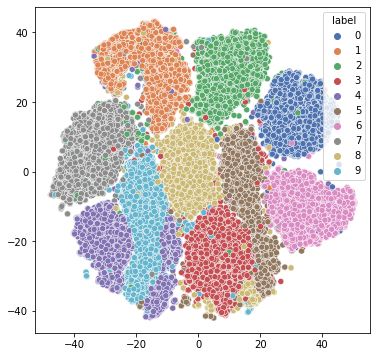

In [12]:
X_embedded = TSNE(n_components=2, perplexity = 30, early_exaggeration = 12, learning_rate = 100).fit_transform(X)
plt.figure(figsize = (6,6))
sns.scatterplot(x = X_embedded[:,0], y = X_embedded[:,1], hue = y, palette = 'deep')

In [13]:
x_train, x_val, y_train, y_val = train_test_split(X,y,test_size=0.2)
print(f'x_train.shape: {x_train.shape}, x_val.shape: {x_val.shape}')

x_train.shape: (33600, 784), x_val.shape: (8400, 784)


In [14]:
def random_view(X, title, y = None):
    fig, axs = plt.subplots(6, 6, sharex= True, sharey = True, figsize = (10, 10))
    fig.suptitle(title)
    
    for i in range(6):
        for j in range(6):
            n = random.randint(0, len(X))
            axs[i][j].imshow(X.iloc[n].values.reshape(28, 28,1))
            if y is not None:
                axs[i][j].set_title(y.iloc[n])

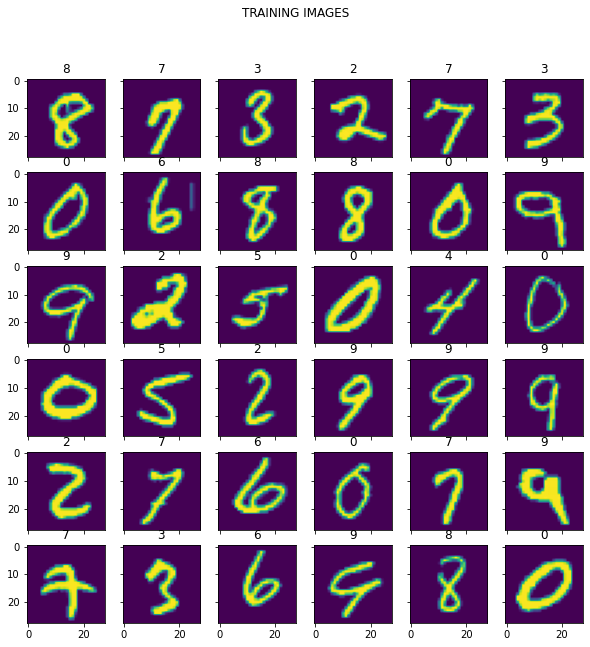

In [15]:
random_view(X, "TRAINING IMAGES", y)

Text(0.5, 1.0, 'Class Distribution')

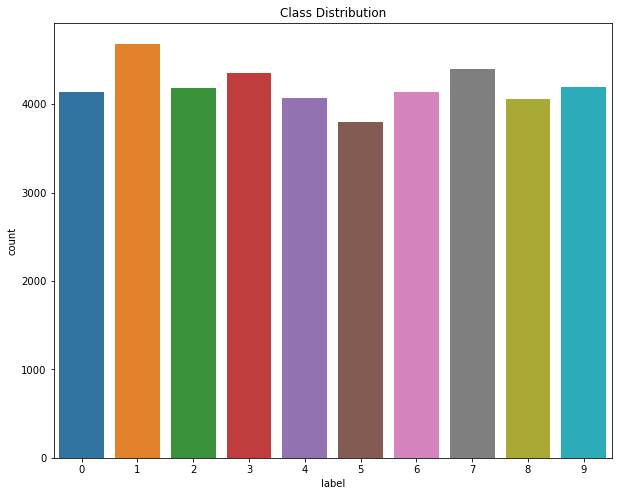

In [16]:
plt.figure(figsize=(10,8))
sns.countplot(x=y)
plt.title('Class Distribution')

**Distributing Data into train and test data**

In [17]:
# Splitting Data
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.33, random_state=42)

**Naive Bayes Classifier**

Accuracy: 56.060606060606055


Text(69.0, 0.5, 'Truth')

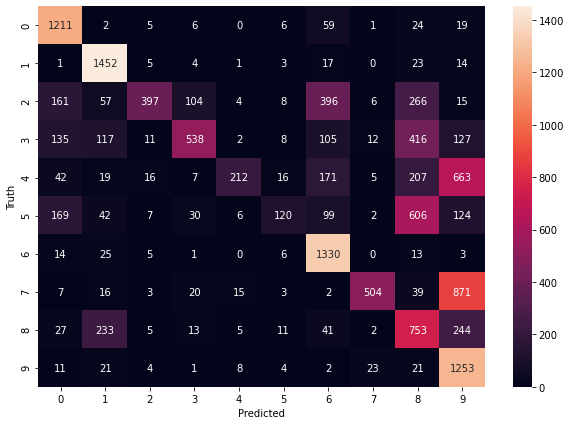

In [18]:
clf = GaussianNB()
clf.fit(X_train,Y_train)
Y_predict_nb = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(Y_test, Y_predict_nb) * 100)
cmNB = confusion_matrix(Y_test, Y_predict_nb)
plt.figure(figsize=(10,7))
sns.heatmap(cmNB,annot=True , fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')

Accuracy for Naive Bayes Classifier
**Accuracy: 56.060606060606055**

**Logistic Regression**

Accuracy: 91.50072150072151


Text(69.0, 0.5, 'Truth')

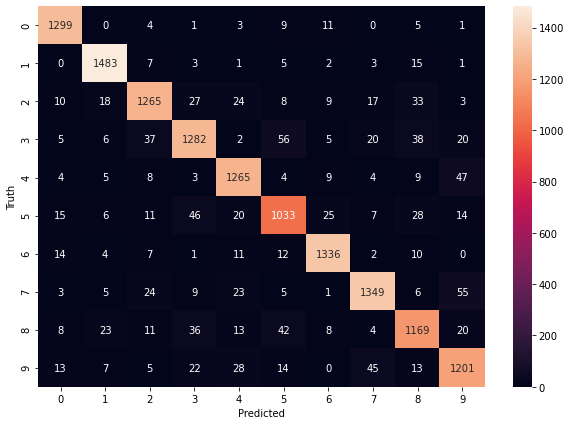

In [19]:
## Logistic Regression
clf = LogisticRegression(random_state=0,solver='liblinear').fit(X_train, Y_train)
Y_predict_lr = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(Y_test, Y_predict_lr) * 100)
#confusion_matrix(Y_test, Y_predict_lr)
cmLR = confusion_matrix(Y_test, Y_predict_lr)
plt.figure(figsize=(10,7))
sns.heatmap(cmLR,annot=True , fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')

Accuracy for Logistic Regression **Accuracy: 91.50072150072151**

**KNN classifier**

Accuracy: 0.9658008658008658


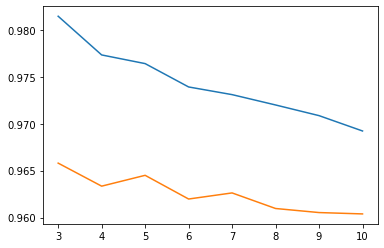

In [20]:
train_scores = []
test_score = []
for i in range(3,11):
    clf = KNeighborsClassifier(i)
    clf.fit(X_train,Y_train)
    train_scores.append(clf.score(X_train,Y_train))
    test_score.append(clf.score(X_test,Y_test))

plt.plot(list(range(3,11)),train_scores)
plt.plot(list(range(3,11)),test_score)

print("Accuracy:",max(test_score))

Accuracy for KNN classifier **Accuracy: 96.58008658008658**

**Confusion Matrix for KNN Classifier**

Text(69.0, 0.5, 'Truth')

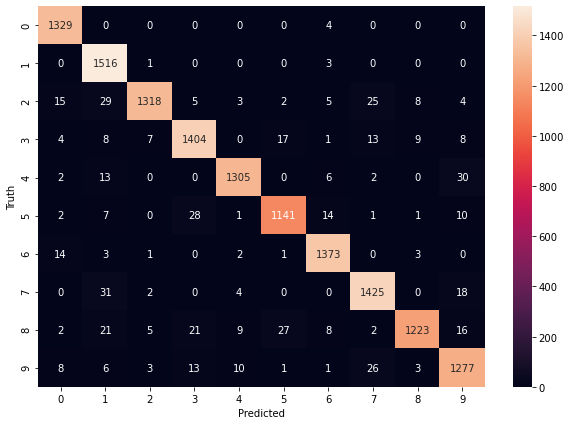

In [21]:
cmKN = confusion_matrix(Y_test,clf.predict(X_test))
plt.figure(figsize=(10,7))
sns.heatmap(cmKN ,annot=True , fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')

**Random Forest**

0.9609668109668109


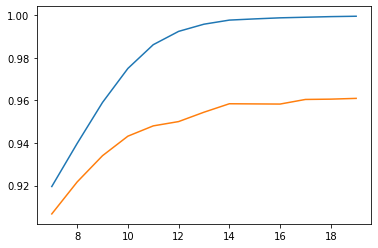

In [22]:
train_scores = []
test_score = []
for i in range(7,20):
    forest_model = RandomForestClassifier(max_depth= i)
    forest_model.fit(X_train,Y_train)
    train_scores.append(forest_model.score(X_train,Y_train))
    test_score.append(forest_model.score(X_test,Y_test))

plt.plot(list(range(7,20)),train_scores)
plt.plot(list(range(7,20)),test_score)

print(max(test_score))

Accuracy for KNN classifier **Accuracy: 96.11111111111111**

**Confusion Matrix for Random Forest**

Text(69.0, 0.5, 'Truth')

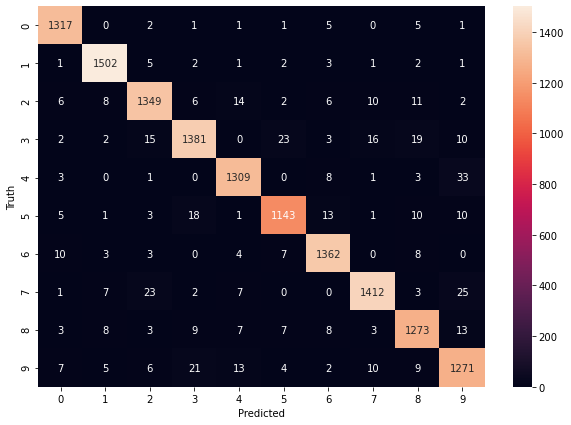

In [23]:
cmRF = confusion_matrix(Y_test,forest_model.predict(X_test))
plt.figure(figsize=(10,7))
sns.heatmap(cmRF ,annot=True , fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')

**ANN**

In [24]:
X,df_test=X.values.reshape(-1,28,28),df_test.values.reshape(-1,28,28)

In [25]:
X.shape,df_test.shape

((42000, 28, 28), (28000, 28, 28))

In [26]:
X[0].shape

(28, 28)

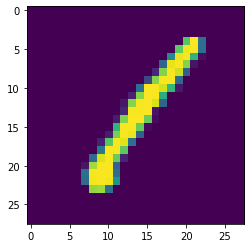

In [27]:
plt.imshow(X[0])

In [28]:
X,df_test=X/255,df_test/255

In [29]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dropout(0.20),
    keras.layers.Dense(50,activation='relu'),
    keras.layers.Dense(25,activation='relu'),
    keras.layers.Dropout(0.10),
    keras.layers.Dense(12,activation='relu'),
    keras.layers.Dense(10,activation='relu'),
    keras.layers.Dense(10,activation='softmax')
])
tensorboard=tf.keras.callbacks.TensorBoard(log_dir='logs/Digit_Recog',histogram_freq=1)
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history=model.fit(X,y,epochs=100,validation_data=(X_test,Y_test),callbacks=tensorboard)

Epoch 1/100
1313/1313 [==============================] - 10s 6ms/step - loss: 1.9986 - accuracy: 0.2394 - val_loss: 74.9380 - val_accuracy: 0.3326
Epoch 2/100
1313/1313 [==============================] - 3s 2ms/step - loss: 1.4268 - accuracy: 0.4470 - val_loss: 70.2096 - val_accuracy: 0.5352
Epoch 3/100
1313/1313 [==============================] - 3s 2ms/step - loss: 0.9504 - accuracy: 0.6764 - val_loss: 69.0205 - val_accuracy: 0.6538
Epoch 4/100
1313/1313 [==============================] - 3s 2ms/step - loss: 0.7310 - accuracy: 0.7655 - val_loss: 83.3662 - val_accuracy: 0.6350
Epoch 5/100
1313/1313 [==============================] - 2s 2ms/step - loss: 0.6042 - accuracy: 0.8176 - val_loss: 86.0261 - val_accuracy: 0.6967
Epoch 6/100
1313/1313 [==============================] - 3s 2ms/step - loss: 0.4934 - accuracy: 0.8569 - val_loss: 87.9015 - val_accuracy: 0.7010
Epoch 7/100
1313/1313 [==============================] - 3s 2ms/step - loss: 0.4319 - accuracy: 0.8757 - val_loss: 96.4963 

1313/1313 [==============================] - 3s 2ms/step - loss: 0.1366 - accuracy: 0.9604 - val_loss: 97.7821 - val_accuracy: 0.7979
Epoch 55/100
1313/1313 [==============================] - 3s 2ms/step - loss: 0.1401 - accuracy: 0.9583 - val_loss: 105.5465 - val_accuracy: 0.7778
Epoch 56/100
1313/1313 [==============================] - 3s 2ms/step - loss: 0.1314 - accuracy: 0.9621 - val_loss: 96.5253 - val_accuracy: 0.8035
Epoch 57/100
1313/1313 [==============================] - 3s 2ms/step - loss: 0.1377 - accuracy: 0.9581 - val_loss: 88.3585 - val_accuracy: 0.8080
Epoch 58/100
1313/1313 [==============================] - 3s 2ms/step - loss: 0.1352 - accuracy: 0.9609 - val_loss: 83.7529 - val_accuracy: 0.8161
Epoch 59/100
1313/1313 [==============================] - 3s 2ms/step - loss: 0.1301 - accuracy: 0.9625 - val_loss: 81.3904 - val_accuracy: 0.8189
Epoch 60/100
1313/1313 [==============================] - 3s 2ms/step - loss: 0.1307 - accuracy: 0.9624 - val_loss: 82.4090 - val_

In [30]:
results = model.evaluate(X_test, Y_test)
print("test loss, test acc:", results)
predictions = model.predict(X_test)
print("predictions shape:", predictions.shape)

434/434 [==============================] - 1s 1ms/step - loss: 62.6121 - accuracy: 0.8372
test loss, test acc: [62.61207580566406, 0.8371573090553284]
predictions shape: (13860, 10)


In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 100)               78500     
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_2 (Dense)              (None, 25)                1275      
_________________________________________________________________
dropout_1 (Dropout)          (None, 25)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 12)                3

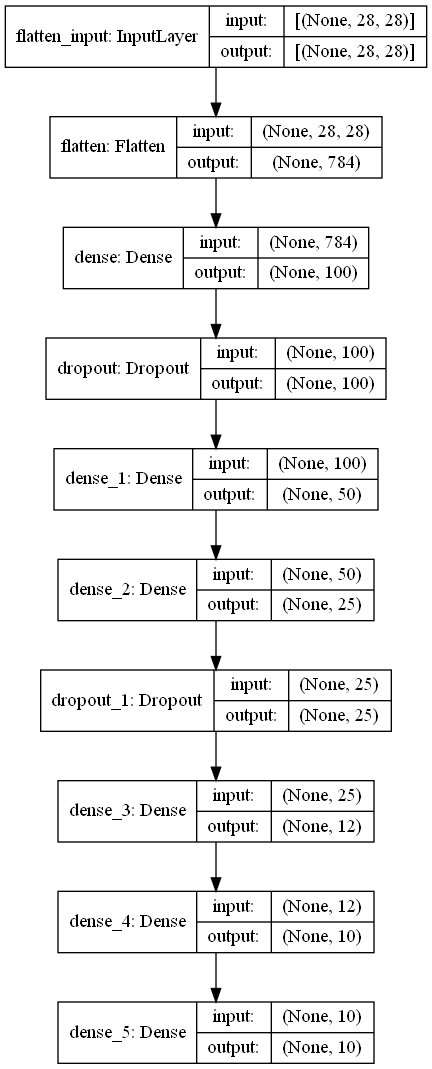

In [32]:
from keras.utils.vis_utils import plot_model
plot_model(model,to_file='model_plot.png',show_shapes=True,show_layer_names=True)

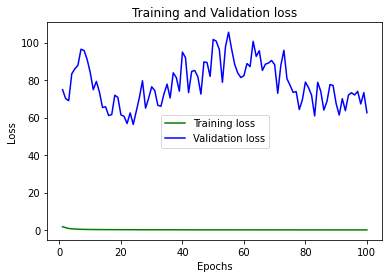

In [33]:
loss_train=history.history['loss']
loss_val=history.history['val_loss']
epochs=range(1,101)
plt.plot(epochs,loss_train,'g',label='Training loss')
plt.plot(epochs,loss_val,'b',label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
#plt.ylim(0,10.0)
plt.legend()
plt.show()

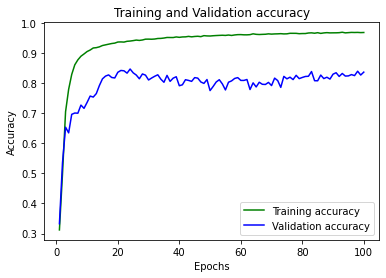

In [34]:
loss_train=history.history['accuracy']
loss_val=history.history['val_accuracy']
epochs=range(1,101)
plt.plot(epochs,loss_train,'g',label='Training accuracy')
plt.plot(epochs,loss_val,'b',label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [35]:
Label=model.predict(df_test)

In [36]:
Label[0]

array([3.4796378e-15, 3.0284216e-06, 9.9998760e-01, 9.4336083e-06,
       6.1116016e-27, 1.0965604e-13, 4.4143778e-21, 8.0405513e-09,
       1.6610380e-09, 1.0660506e-21], dtype=float32)

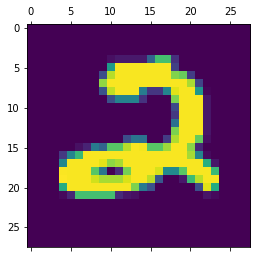

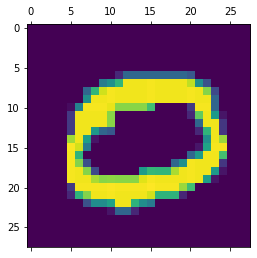

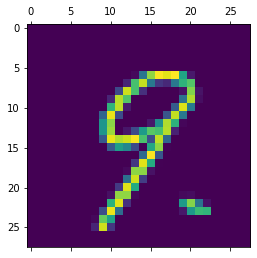

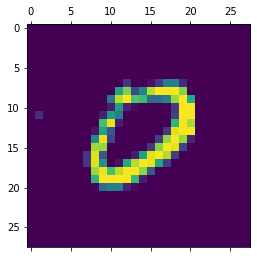

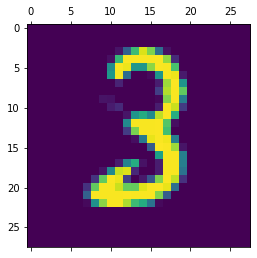

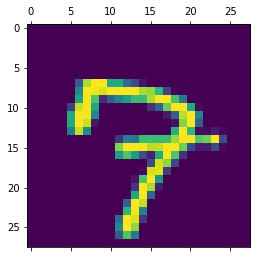

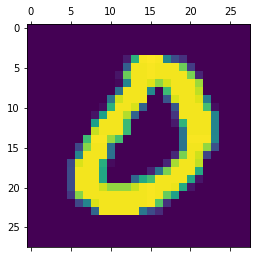

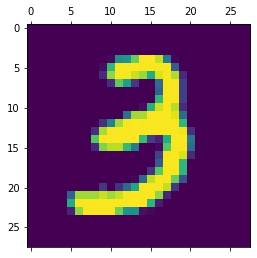

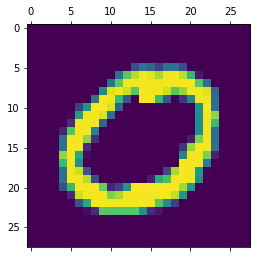

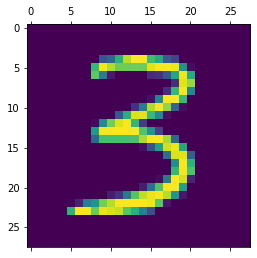

In [37]:
for i in range(10):
    plt.matshow(df_test[i])

In [38]:
np.argmax(Label[0])

2

In [39]:
Label=[np.argmax(i) for i in Label]
Label[:10]

[2, 0, 9, 9, 3, 7, 0, 3, 0, 3]